# Basic Plotly Charts

## Objectives

In this lab, you will learn about creating plotly charts using plotly.graph_objects and plotly.express.

Learn more about:

*   [Plotly python](https://plotly.com/python/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   [Plotly Graph Objects](https://plotly.com/python/graph-objects/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   [Plotly Express](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   Handling data using [Pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Airline Reporting Carrier On-Time Performance Dataset

The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight arriving on time.

Preview data, dataset metadata, and data glossary [here.](https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/data-preview/index.html)

In [1]:
# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### Read Data

In [2]:
url = '/Users/QXJ/Desktop/IBM/Data visualization/airline_data.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(url,index_col = False)
df.head()

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0     1295781  1998        2      4           2          4  1998-04-02   
1     1125375  2013        2      5          13          1  2013-05-13   
2      118824  1993        3      9          25          6  1993-09-25   
3      634825  1994        4     11          12          6  1994-11-12   
4     1888125  2017        3      8          17          4  2017-08-17   

  Reporting_Airline  DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline  \
0                AS                     19930                          AS   
1                EV                     20366                          EV   
2                UA                     19977                          UA   
3                HP                     19991                          HP   
4                UA                     19977                          UA   

  Tail_Number  Flight_Number_Reporting_Airline  OriginAirportID  \
0      N785AS                              584            11884   
1      N24103                             4132            11618   
2         NaN                             2206            14108   
3         NaN                             1207            12892   
4      N827UA                              576            11003   

   OriginAirportSeqID  OriginCityMarketID Origin              OriginCityName  \
0             1188401               31884    GEG                 Spokane, WA   
1             1161802               31703    EWR                  Newark, NJ   
2             1410801               34108    PIA                  Peoria, IL   
3             1289201               32575    LAX             Los Angeles, CA   
4             1100303               31003    CID  Cedar Rapids/Iowa City, IA   

  OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  \
0          WA             53.0      Washington         93          14747   
1          NJ             34.0      New Jersey         21          14524   
2          IL             17.0        Illinois         41          13930   
3          CA              6.0      California         91          14107   
4          IA             19.0            Iowa         61          11292   

   DestAirportSeqID  DestCityMarketID Dest  DestCityName DestState  \
0           1474702             30559  SEA   Seattle, WA        WA   
1           1452401             34524  RIC  Richmond, VA        VA   
2           1393001             30977  ORD   Chicago, IL        IL   
3           1410701             30466  PHX   Phoenix, AZ        AZ   
4           1129202             30325  DEN    Denver, CO        CO   

   DestStateFips DestStateName  DestWac  CRSDepTime  DepTime  DepDelay  \
0           53.0    Washington       93        1330   1330.0       0.0   
1           51.0      Virginia       38        1301   1255.0      -6.0   
2           17.0      Illinois       41        1650   1723.0      33.0   
3            4.0       Arizona       81        1245   1309.0      24.0   
4            8.0      Colorado       82         755    746.0      -9.0   

   DepDelayMinutes  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  \
0              0.0       0.0                   0.0  1300-1359      8.0   
1              0.0       0.0                  -1.0  1300-1359      9.0   
2             33.0       1.0                   2.0  1600-1659      NaN   
3             24.0       1.0                   1.0  1200-1259      NaN   
4              0.0       0.0                  -1.0  0700-0759      8.0   

   WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrTime  ArrDelay  \
0     1338.0    1415.0     5.0        1426   1420.0      -6.0   
1     1304.0    1358.0    13.0        1423   1411.0     -12.0   
2        NaN       NaN     NaN        1730   1815.0      45.0   
3        NaN       NaN     NaN        1457   1538.0      41.0   
4      754.0     836.0     8.0         902    844.0     -18.0   

   ArrDelayMinutes  ArrDel15  ArrivalDelayGroups Arr

In [3]:
df.shape

(27000, 110)

In [4]:
df = df[['Year', 'Quarter', 'Month','FlightDate','Reporting_Airline','OriginState','DestState','DepTime','ArrTime','DepDelay','ArrDelay','Distance','DistanceGroup','Flights']]

In [5]:
df.head()

Year  Quarter  Month  FlightDate Reporting_Airline OriginState DestState  \
0  1998        2      4  1998-04-02                AS          WA        WA   
1  2013        2      5  2013-05-13                EV          NJ        VA   
2  1993        3      9  1993-09-25                UA          IL        IL   
3  1994        4     11  1994-11-12                HP          CA        AZ   
4  2017        3      8  2017-08-17                UA          IA        CO   

   DepTime  ArrTime  DepDelay  ArrDelay  Distance  DistanceGroup  Flights  
0   1330.0   1420.0       0.0      -6.0     224.0              1      1.0  
1   1255.0   1411.0      -6.0     -12.0     277.0              2      1.0  
2   1723.0   1815.0      33.0      45.0     130.0              1      1.0  
3   1309.0   1538.0      24.0      41.0     370.0              2      1.0  
4    746.0    844.0      -9.0     -18.0     692.0              3      1.0

In [6]:
df.columns

Index(['Year', 'Quarter', 'Month', 'FlightDate', 'Reporting_Airline',
       'OriginState', 'DestState', 'DepTime', 'ArrTime', 'DepDelay',
       'ArrDelay', 'Distance', 'DistanceGroup', 'Flights'],
      dtype='object')

In [7]:
# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = df.sample(n=500, random_state=42)

In [8]:
data.shape

(500, 14)

### Structure

#### plotly.graph_objects

1.  Scatter plot 

    Theme: How departure time changes with respect to airport distance

2.  - Line plot

    Theme: Extract average monthly delay time and see how it changes over the year

#### plotly.express

1.  Bar chart 

    Theme: Extract number of flights from a specific airline that goes to a destination

2.  Bubble chart

    Theme: Get number of flights as per reporting airline

3.  Histogram

    Theme: Get distribution of arrival delay

4.  Pie chart

    Theme: Proportion of distance group by month (month indicated by numbers)

5.  Sunburst chart

    Theme: Hierarchical view in othe order of month and destination state holding value of number of flights


## plotly.graph_objects

### 1. Scatter plot

In [9]:
# First we create a figure using go.Figure and adding trace to it through go.scatter
fig = go.Figure(data=go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
# Updating layout through `update_layout`. Here we are adding title to the plot and providing title to x and y axis.
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
# Display the figure
fig.show()

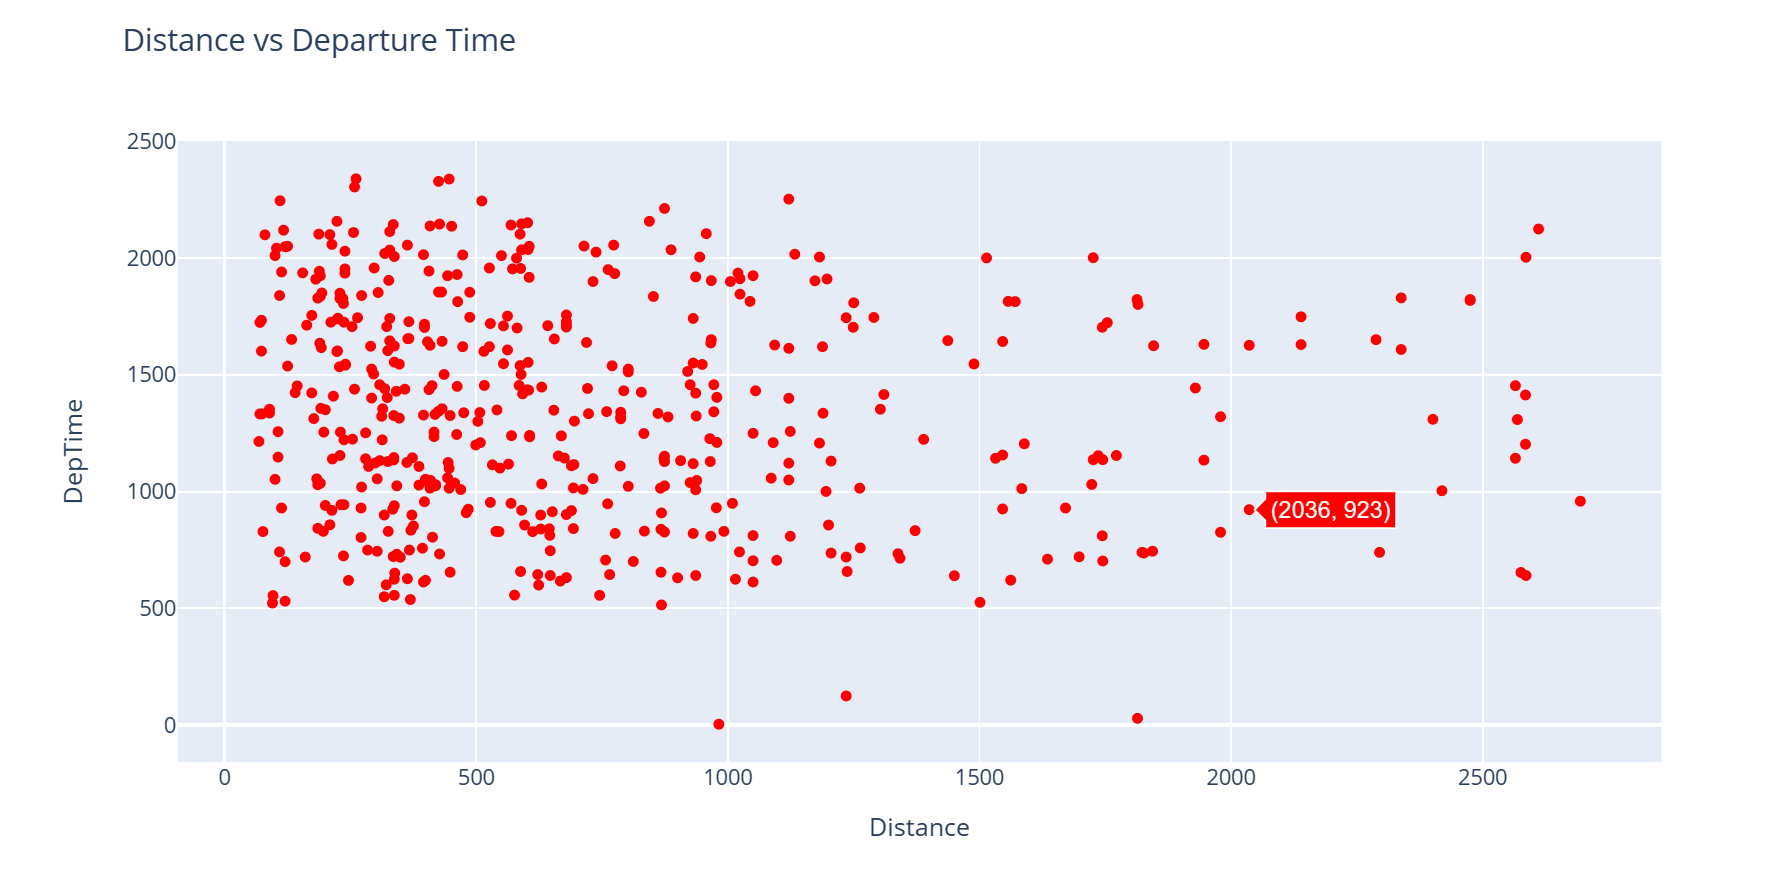

### 2. Line chart

In [10]:
# Extract average monthly arrival delay time and see how it changes over the year
df_month = data.groupby('Month')['ArrDelay'].mean().reset_index()
df_month

Month   ArrDelay
0       1   2.232558
1       2   2.687500
2       3  10.868421
3       4   6.229167
4       5  -0.279070
5       6  17.310345
6       7   5.088889
7       8   3.121951
8       9   9.081081
9      10   1.200000
10     11  -3.975000
11     12   3.240741

In [37]:
# First we create a figure using go.Figure and adding trace to it through go.scatter
fig = go.Figure(data=go.Scatter(x=df_month['Month'], y=df_month['ArrDelay'], mode='lines', marker=dict(color='green')))
# Updating layout through `update_layout`. Here we are adding title to the plot and providing title to x and y axis.
fig.update_layout(title='Average arrival delay by month', xaxis_title='Month', yaxis_title='Arrival delay')
# Display the figure
fig.show()

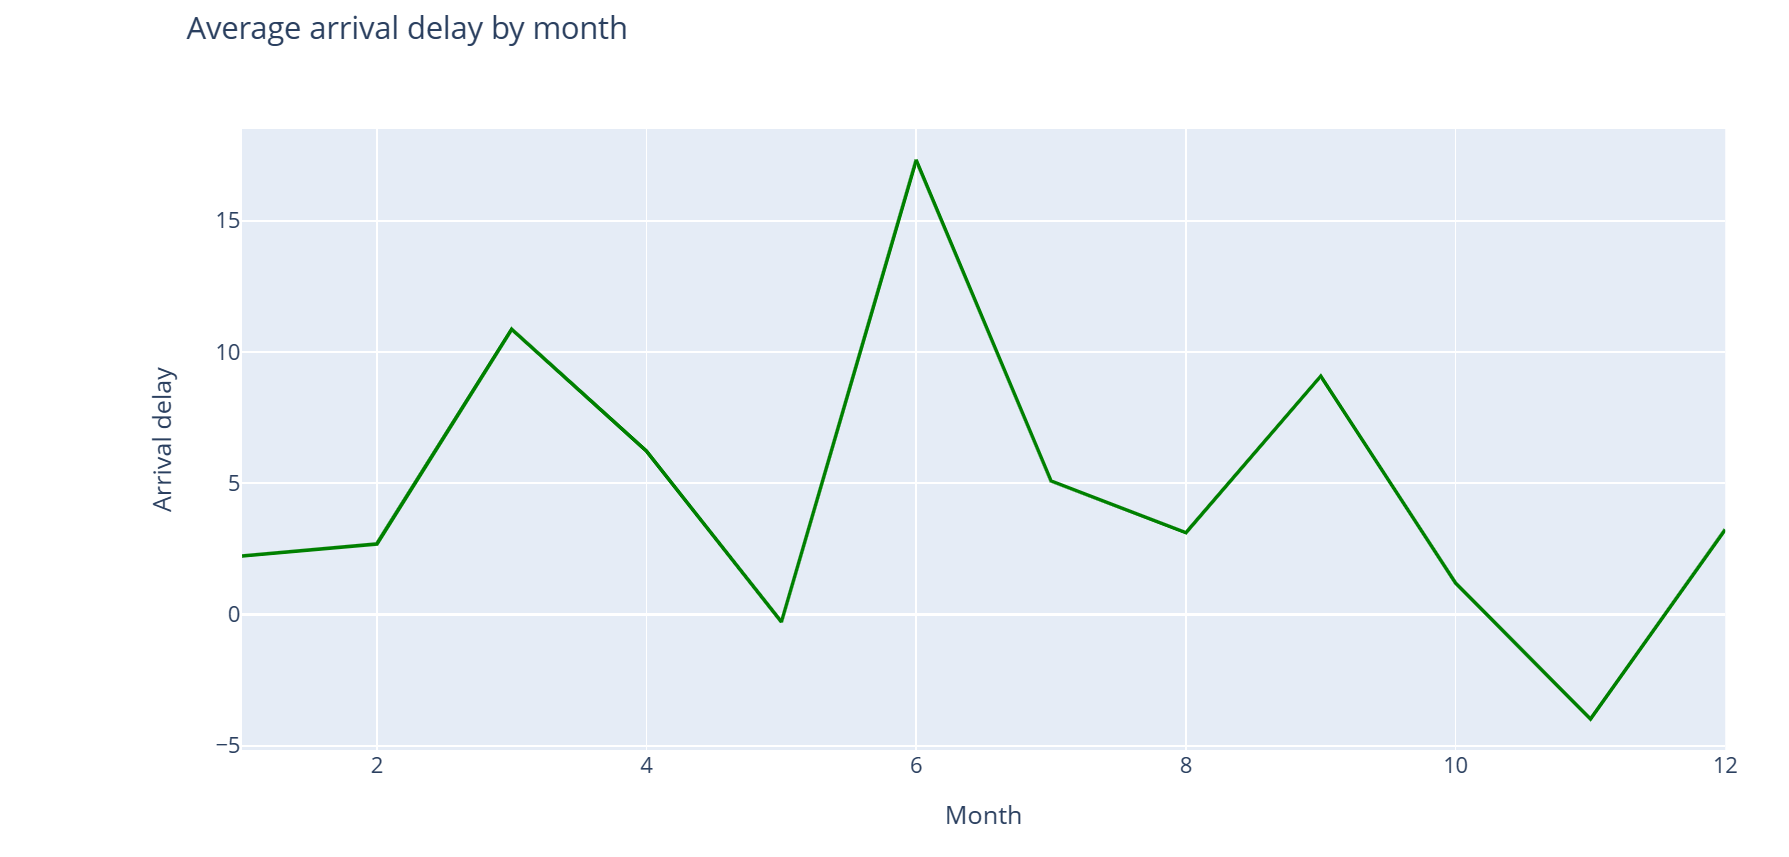

## Plotly.express

### 1. Bar Chart

In [18]:
# Compute total number of flights in each combination of destinatoin 
df_dest = data.groupby('DestState')['Flights'].sum().reset_index()
df_dest.head()

DestState  Flights
0        AK      4.0
1        AL      3.0
2        AZ      8.0
3        CA     68.0
4        CO     20.0

In [20]:
fig = px.bar(df_dest, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

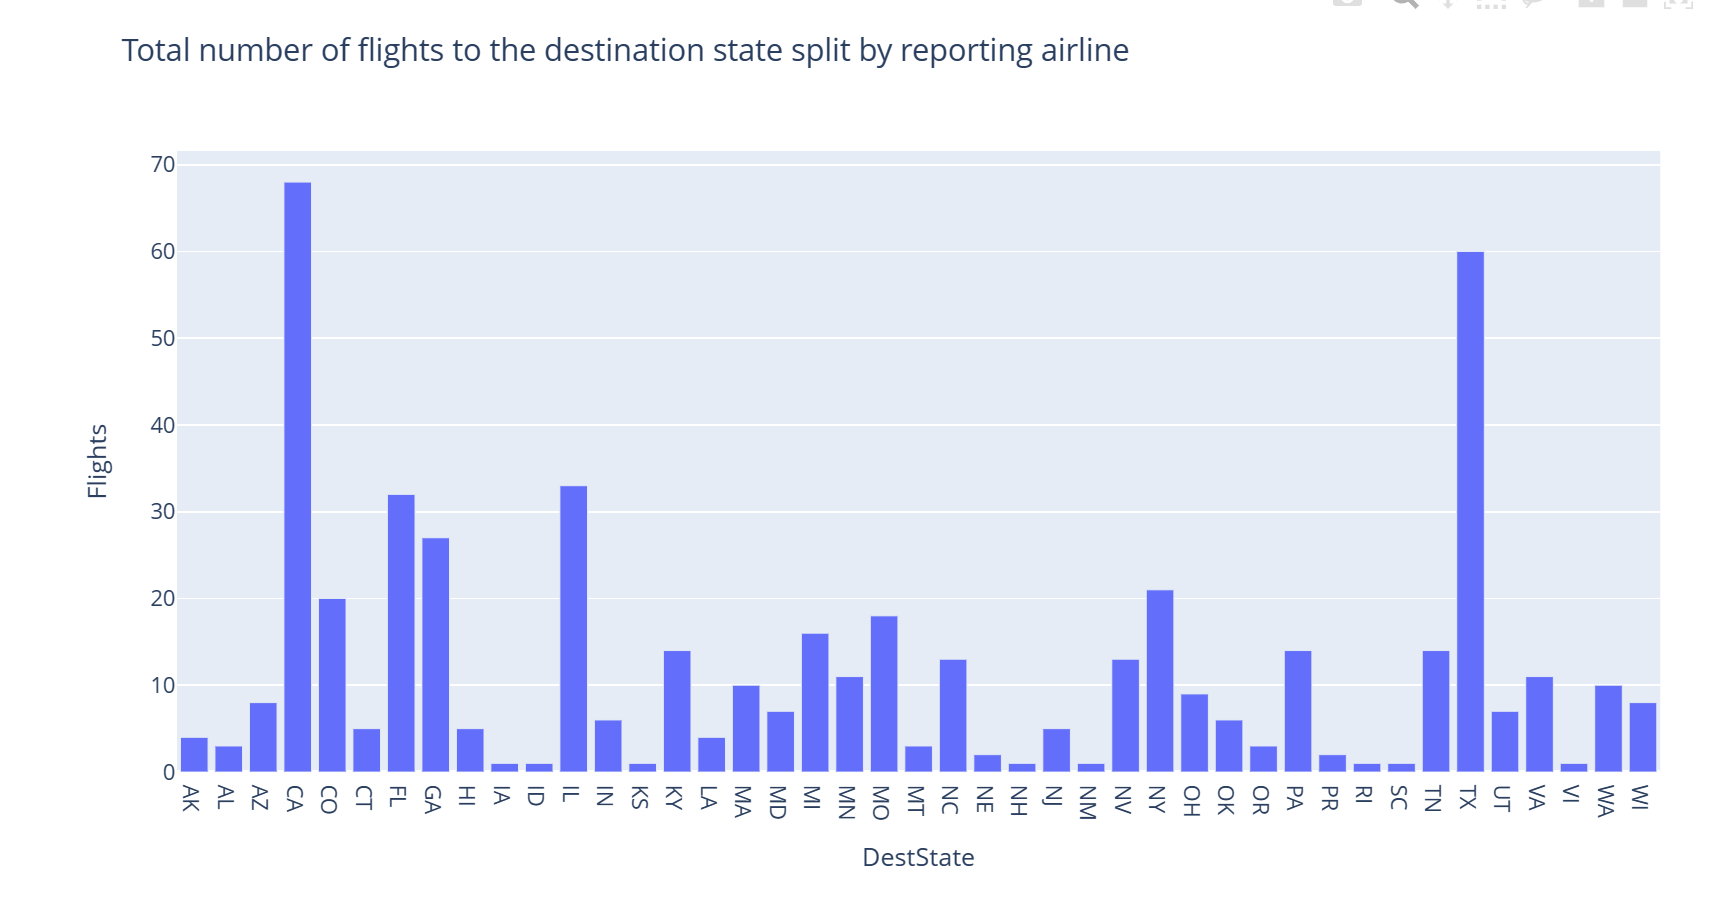

### 3. Bubble chart

In [22]:
# Group the data by reporting airline and get number of flights
df_reporting = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()
df_reporting.head()

Reporting_Airline  Flights
0                9E      5.0
1                AA     57.0
2                AS     14.0
3                B6     10.0
4                CO     12.0

In [29]:
fig = px.scatter(df_reporting, x="Reporting_Airline", y="Flights", size='Flights',hover_name='Reporting_Airline', title='Reporting airline vs. Total number of flights') 
fig.show()

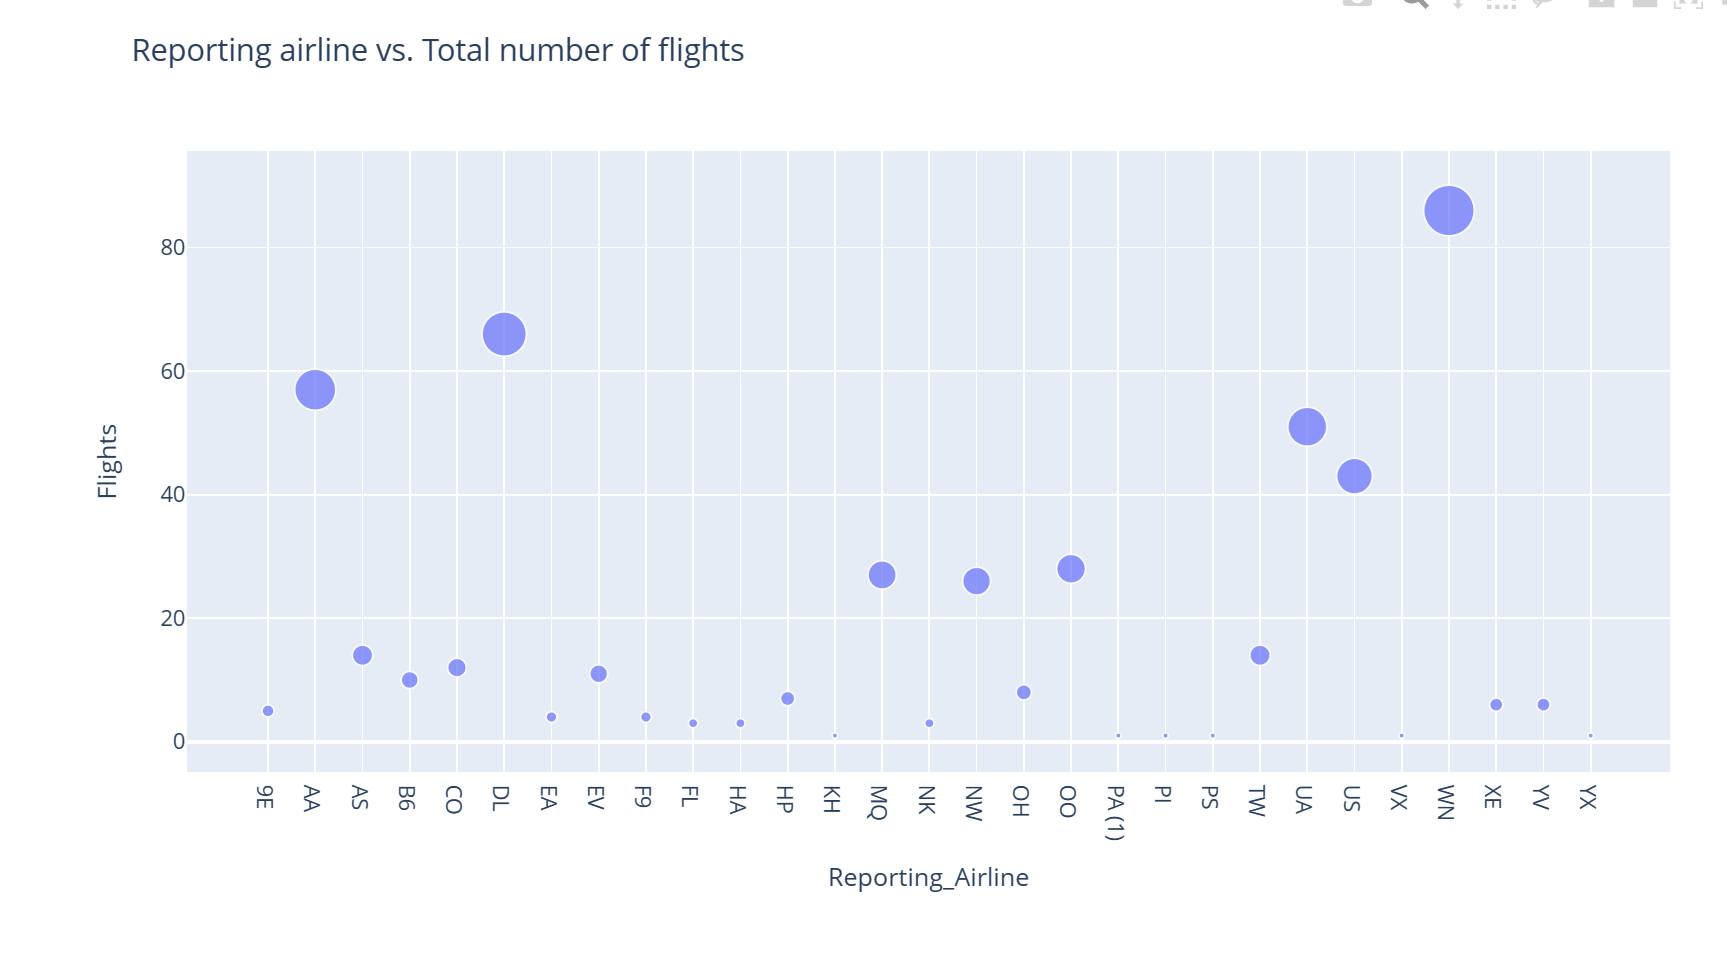

### 3. Histogram

In [30]:
# Set missing values to 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)

In [33]:
fig = px.histogram(data,x='ArrDelay')
fig.show()

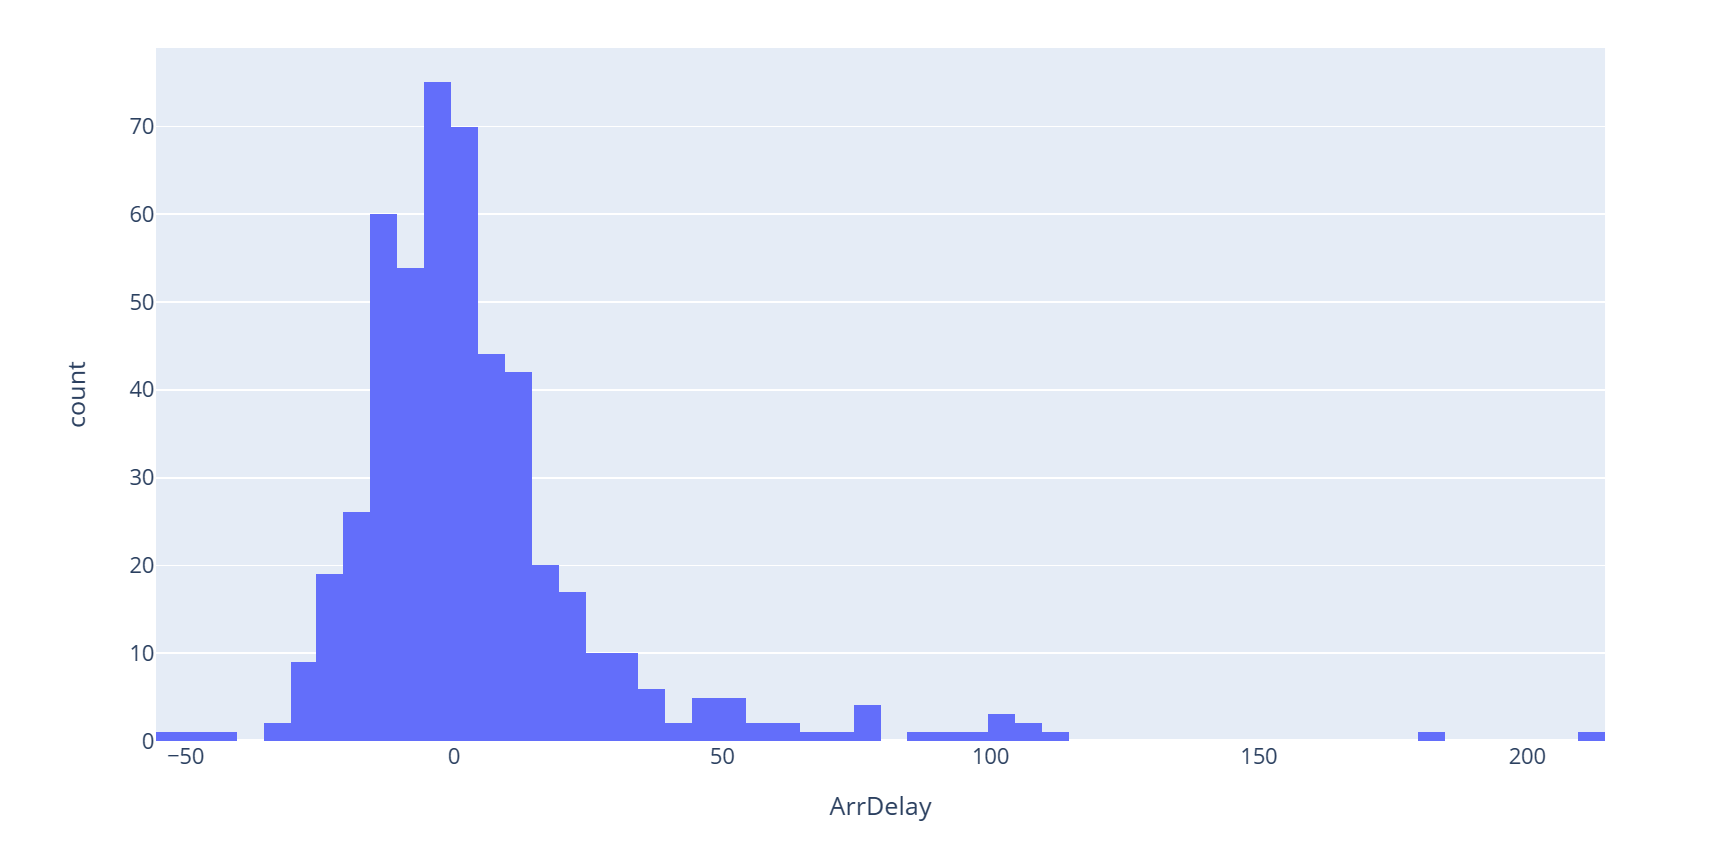

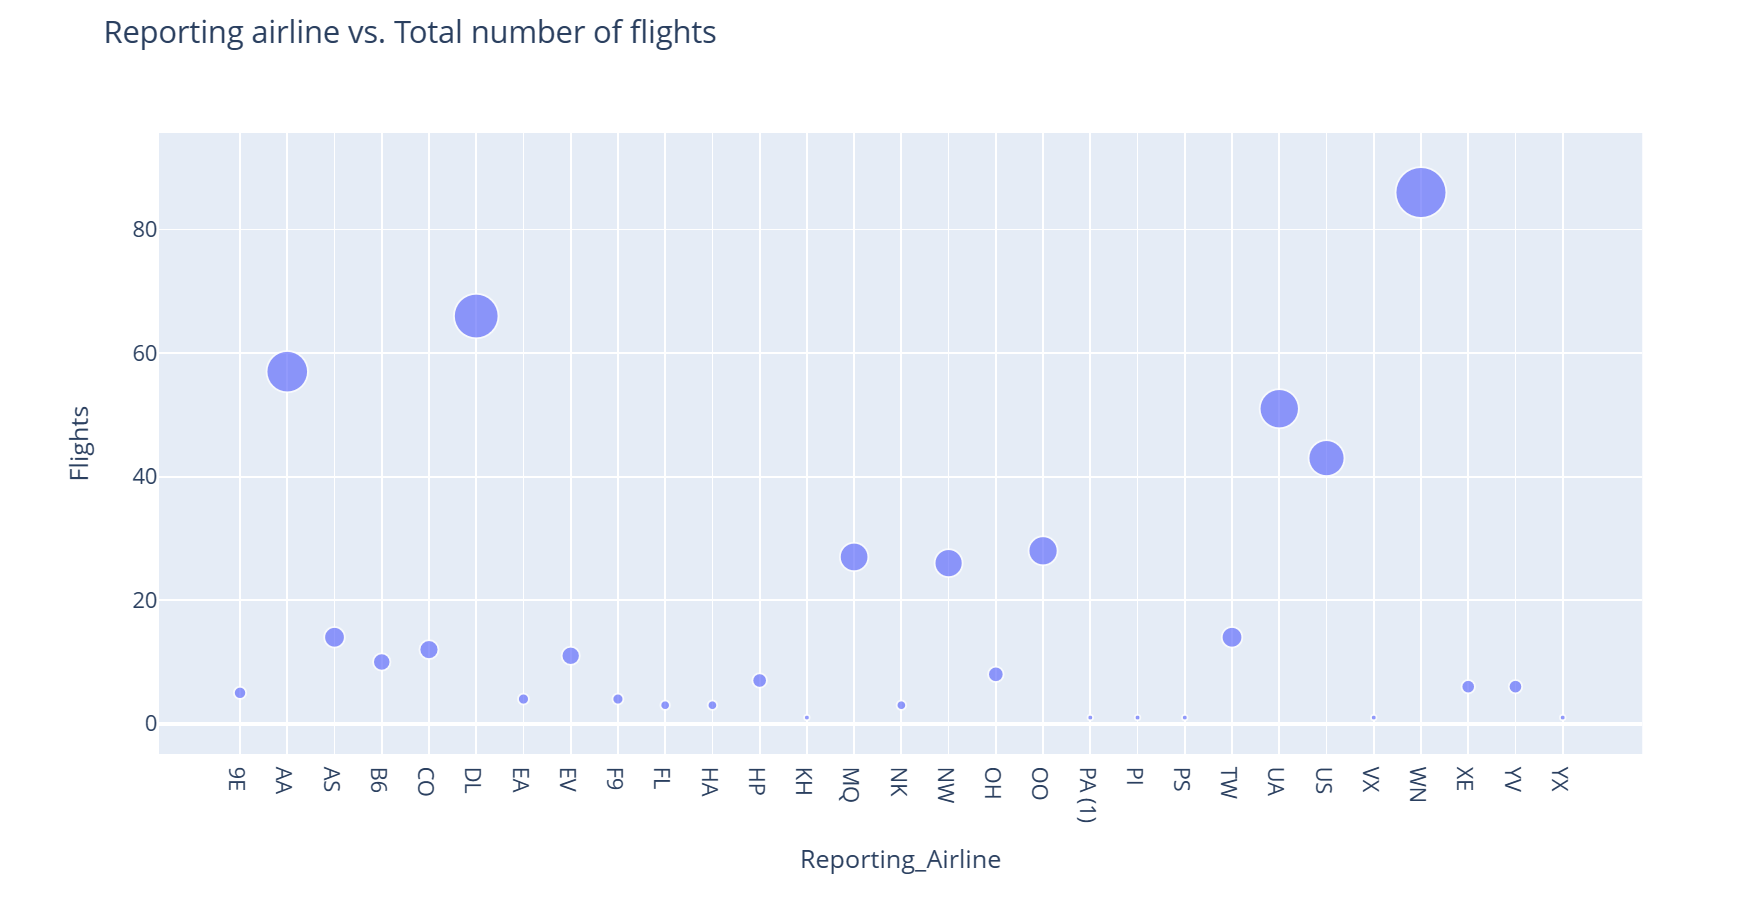

### 4. Pie chart

In [34]:
fig = px.pie(data, values='Month', names='DistanceGroup', title='Distance group proportion by month')
fig.show()

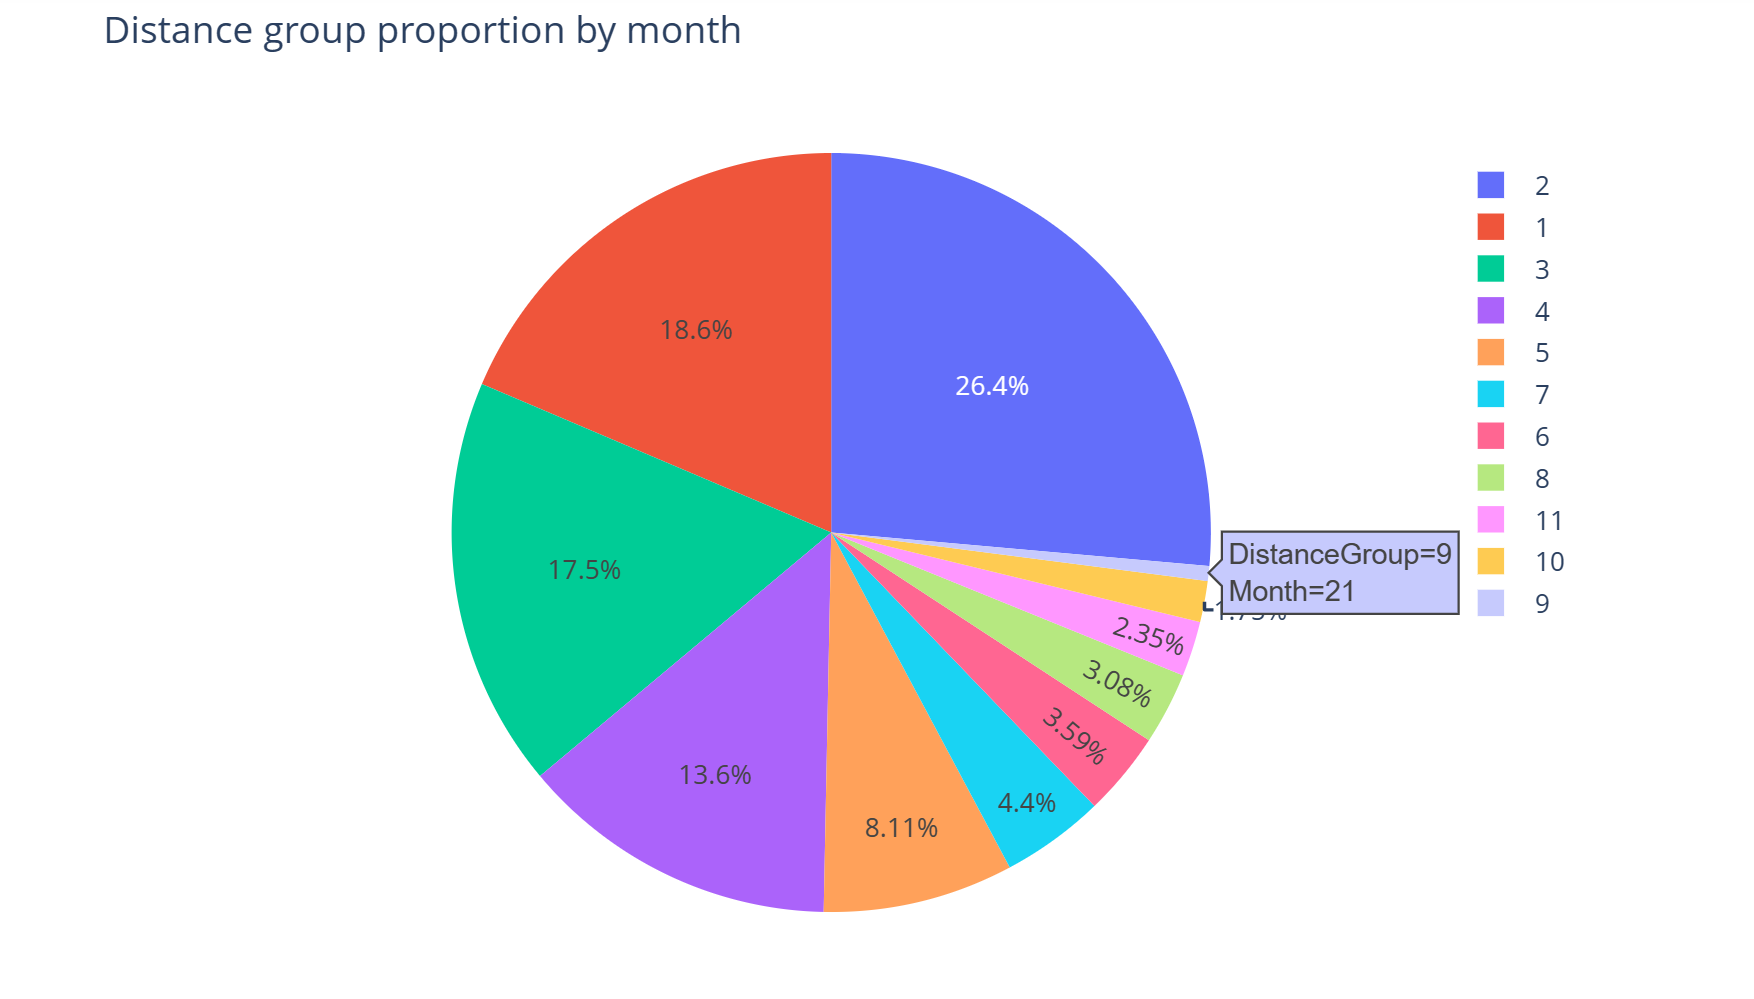

### 5. Sunburst chart*

*Idea: Hierarchical view in othe order of month and destination state holding value of number of flights*

In [36]:
fig = px.sunburst(data, path=['Month', 'DestState'], values='Flights')
fig.show()

C:\Users\QXJ\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\QXJ\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



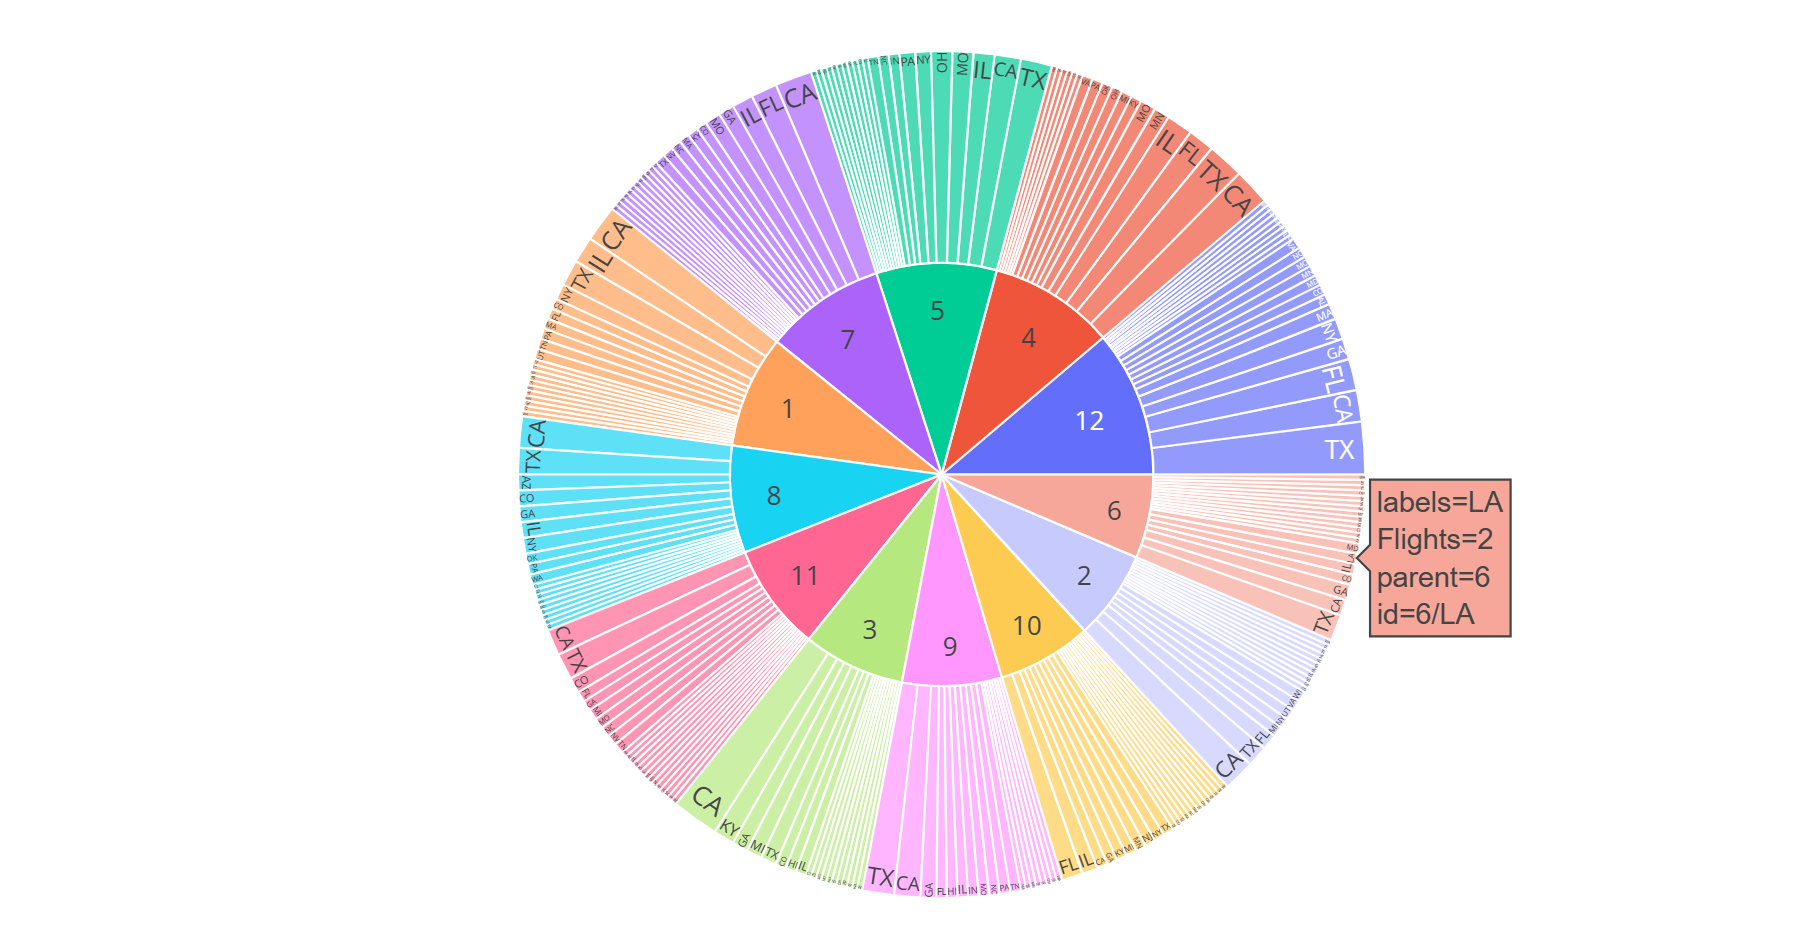